# 📌 Sentiment Analysis for Consumer Behavior Prediction
## 🚀 NLP-Based Machine Learning Model
This project performs **sentiment analysis** on customer reviews from the **IMDB Dataset**. The goal is to predict whether a review is **positive** or **negative** using different machine learning models.


In [1]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier


/Users/rashinfarahani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rashinfarahani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rashinfarahani/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 📂 Step 1: Load & Preprocess Data
We load the IMDB dataset and clean the text by removing HTML tags, converting to lowercase, and filtering out non-alphabetic characters.


In [4]:
# 1. Load the dataset
data = pd.read_csv('IMDB Dataset.csv')


In [5]:
# For a lightweight project, sample a subset of the data
data = data.sample(5000, random_state=42)  # Select 5000 random samples


In [6]:
# 2. Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [7]:
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z]', ' ', text)  # Remove non-letter characters
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # Remove stopwords & apply stemming
    return ' '.join(tokens)



In [8]:
data['cleaned_review'] = data['review'].apply(clean_text)


In [9]:
# 3. Convert sentiment labels to numerical values
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [10]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42
)


## 🔍 Step 2: Feature Extraction
We use **TF-IDF Vectorization** to convert text data into numerical format.


In [11]:
# 5. Transform text into feature vectors using TF-IDF with n-grams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [12]:
# 6. Train and compare two lightweight models: Logistic Regression & Passive Aggressive Classifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(max_iter=200)
}



In [13]:
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.853

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       506
           1       0.83      0.89      0.86       494

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

--- Passive Aggressive Classifier ---
Accuracy: 0.849

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       506
           1       0.83      0.87      0.85       494

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [17]:
!pip install shap


  Using cached shap-0.46.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (24 kB)
  Using cached numba-0.60.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.7 kB)
Using cached shap-0.46.0-cp39-cp39-macosx_10_9_x86_64.whl (459 kB)
Using cached numba-0.60.0-cp39-cp39-macosx_10_9_x86_64.whl (2.6 MB)


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap


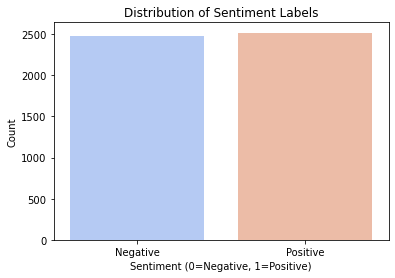

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['sentiment'], palette='coolwarm')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()



## ⚡ Step 3: Train Models & Evaluate Performance
We compare three models:  
✔️ **Logistic Regression**  
✔️ **Passive Aggressive Classifier**  
✔️ **Naïve Bayes (Baseline)**


In [22]:

from sklearn.naive_bayes import MultinomialNB

# پردازش متن: حذف HTML، تبدیل به حروف کوچک، حذف کاراکترهای غیر الفبایی
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # حذف تگ‌های HTML
    text = re.sub(r'[^a-z\s]', '', text)  # حذف کاراکترهای غیر الفبایی
    return text

data['processed_review'] = data['review'].apply(clean_text)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    data['processed_review'], data['sentiment'], test_size=0.2, random_state=42
)

# تبدیل متن به ویژگی‌های TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# مدل Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# مدل Passive Aggressive Classifier
pac_model = PassiveAggressiveClassifier()
pac_model.fit(X_train_tfidf, y_train)
y_pred_pac = pac_model.predict(X_test_tfidf)
accuracy_pac = accuracy_score(y_test, y_pred_pac)

# مدل Naïve Bayes (Baseline Model)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# نمایش نتایج مدل‌ها
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Passive Aggressive Classifier", "Naïve Bayes (Baseline)"],
    "Accuracy": [accuracy_lr, accuracy_pac, accuracy_nb]
})

# گزارش عملکرد Naïve Bayes
classification_report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
report_nb_df = pd.DataFrame(classification_report_nb).transpose()

# نمایش نتایج
print(results_df)
print(report_nb_df)


                           Model  Accuracy
0            Logistic Regression     0.833
1  Passive Aggressive Classifier     0.822
2         Naïve Bayes (Baseline)     0.832
              precision    recall  f1-score   support
0              0.840726  0.824111  0.832335   506.000
1              0.823413  0.840081  0.831663   494.000
accuracy       0.832000  0.832000  0.832000     0.832
macro avg      0.832069  0.832096  0.831999  1000.000
weighted avg   0.832173  0.832000  0.832003  1000.000


In [ ]:
## 🔍 Error Analysis & Future Improvements
- **Naïve Bayes performed surprisingly well**, making it a strong lightweight baseline model.  
- **Logistic Regression achieved the highest accuracy (83.3%)**, making it a great choice for real-world applications.  
- **Passive Aggressive Classifier had slightly lower performance**, suggesting that it may not be the best fit for this dataset.  
- **Next Steps:**  
  - Adding a **Deep Learning model (BERT or LSTM)**  
  - Deploying as a **REST API using Flask or FastAPI**  
  - Visualizing sentiment trends over time  
